# Lab 3 PCA

## WDBC data

In [1]:
import pandas as pd

df = pd.read_csv('wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
df

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df['diagnosis'].replace('B', 'Benign', inplace=True)
df['diagnosis'].replace('M', 'Malignant', inplace=True)
df

,patient_id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Put the features, labels into their own dataframes
feature_df = df.iloc[:,2:]
label_df = df.iloc[:,1]

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

x = feature_df.values
x = StandardScaler().fit_transform(x)

In [7]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()
normalised_breast

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [9]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_df = pd.DataFrame(data = principalComponents_breast, 
                                   columns = ['principal component 1', 'principal component 2'])

In [16]:
print(f'Explained variation per principal component: {pca_breast.explained_variance_ratio_}')

      

Explained variation per principal component: [0.44272026 0.18971182]


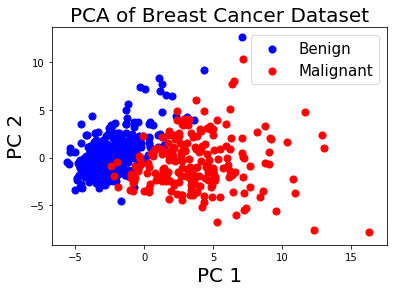

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.xlabel('PC 1',fontsize=20)
plt.ylabel('PC 2',fontsize=20)
plt.title("PCA of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [12]:
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.4427
 1: 0.1897
 2: 0.0939
 3: 0.0660
 4: 0.0550
 5: 0.0402
 6: 0.0225
 7: 0.0159
 8: 0.0139
 9: 0.0117
10: 0.0098
11: 0.0087
12: 0.0080
13: 0.0052
14: 0.0031
15: 0.0027
16: 0.0020
17: 0.0018
18: 0.0016
19: 0.0010
20: 0.0010
21: 0.0009
22: 0.0008
23: 0.0006
24: 0.0005
25: 0.0003
26: 0.0002
27: 0.0001
28: 0.0000
29: 0.0000


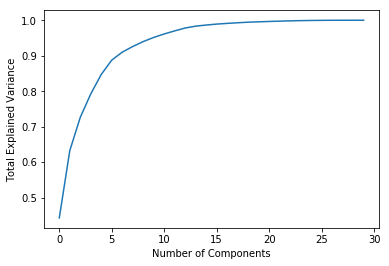

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');

## Gisette data

In [64]:
import pandas as pd

gis_df = pd.read_csv('gisette_train.data', header=None, delim_whitespace=True)
gis_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0


In [65]:
col_labels = pd.read_csv('gisette_train.labels', header = None, delim_whitespace=True).iloc[:,0]


In [66]:
from sklearn.preprocessing import StandardScaler
import numpy as np

gis_x = StandardScaler().fit_transform(gis_df.values)
gis_x

array([[ 1.54121954, -0.12304076,  0.94149741, ..., -0.13759497,
        -0.41609101,  2.53952425],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       ...,
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076, -0.50701041, ..., -0.13759497,
        -0.41609101, -0.4704356 ],
       [-0.38979376, -0.12304076,  2.3929315 , ..., -0.13759497,
        -0.41609101,  2.56402036]])

In [67]:
from sklearn.decomposition import PCA

pca_gis = PCA(n_components=2)
principalComponents_gis = pca_gis.fit_transform(gis_x)

principal_gis_df = pd.DataFrame(data = principalComponents_gis, 
                                columns = ['pc 1', 'pc 2'])

In [69]:
print(f'Explained variation per principal component: {pca_gis.explained_variance_ratio_}')


Explained variation per principal component: [0.02883488 0.02258951]


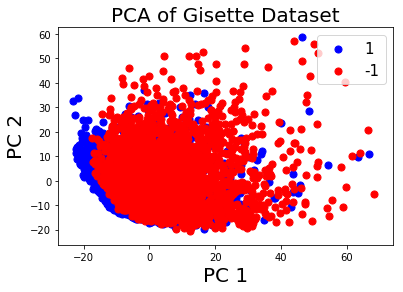

In [71]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.xlabel('PC 1', fontsize=20)
plt.ylabel('PC 2', fontsize=20)
plt.title("PCA of Gisette Dataset", fontsize=20)
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = col_labels == target
    plt.scatter(principal_gis_df.loc[indicesToKeep, 'pc 1']
               , principal_gis_df.loc[indicesToKeep, 'pc 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [72]:
pca = PCA().fit(gis_x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069
10: 0.0065
11: 0.0056
12: 0.0052
13: 0.0049
14: 0.0047
15: 0.0044
16: 0.0040
17: 0.0039
18: 0.0037
19: 0.0036
20: 0.0035
21: 0.0033
22: 0.0033
23: 0.0032
24: 0.0029
25: 0.0029
26: 0.0028
27: 0.0027
28: 0.0027
29: 0.0026
30: 0.0025
31: 0.0024
32: 0.0024
33: 0.0023
34: 0.0022
35: 0.0022
36: 0.0021
37: 0.0021
38: 0.0021
39: 0.0020
40: 0.0020
41: 0.0019
42: 0.0019
43: 0.0019
44: 0.0019
45: 0.0018
46: 0.0018
47: 0.0017
48: 0.0017
49: 0.0017
50: 0.0016
51: 0.0016
52: 0.0016
53: 0.0016
54: 0.0016
55: 0.0015
56: 0.0015
57: 0.0015
58: 0.0014
59: 0.0014
60: 0.0014
61: 0.0014
62: 0.0014
63: 0.0014
64: 0.0013
65: 0.0013
66: 0.0013
67: 0.0013
68: 0.0013
69: 0.0013
70: 0.0013
71: 0.0013
72: 0.0012
73: 0.0012
74: 0.0012
75: 0.0012
76: 0.0012
77: 0.0012
78: 0.0011
79: 0.0011
80: 0.0011
81: 0.0011
82: 0.0011
83: 0.0011
84: 0.0011
85: 0.0011
86: 0.0011
87: 0.0010
88: 0.0010
89: 0.0010
90: 0.0010

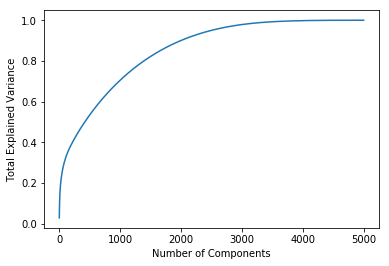

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');